<a href="https://colab.research.google.com/github/Minamnn/Machine-Learning-Decision-Tree-and-Data-Analysis-in-Pyspark-on-Google-Colab-platform/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!rm -dr spark*
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!ls -ls
!pip install -q findspark
!pip install pyspark

rm: cannot remove 'spark*': No such file or directory
total 293924
     4 drwxr-xr-x  1 root root      4096 Dec  3 14:33 sample_data
     4 drwxr-xr-x 13 1000 1000      4096 Oct  6 13:18 spark-3.2.0-bin-hadoop3.2
293916 -rw-r--r--  1 root root 300965906 Oct  6 13:50 spark-3.2.0-bin-hadoop3.2.tgz
     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 198 kB 39.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=373167e16433ccf6ec829728a5bb2d4224bbd7110766099497287fd184ab4f63
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("Colab").config('spark.ui.port', '4050').getOrCreate()



In [3]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group 40').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"

In [ ]:
# Load Data
df1 = spark.read.load("IDS2018/02-14-2018.csv", format="csv", inferSchema=True, header=True)
df2 = spark.read.load("IDS2018/02-15-2018.csv", format="csv", inferSchema=True, header=True)
df3 = spark.read.load("IDS2018/02-16-2018.csv", format="csv", inferSchema=True, header=True)
df4 = spark.read.load("IDS2018/02-21-2018.csv", format="csv", inferSchema=True, header=True)
df5 = spark.read.load("IDS2018/02-22-2018.csv", format="csv", inferSchema=True, header=True)
df6 = spark.read.load("IDS2018/02-23-2018.csv", format="csv", inferSchema=True, header=True)
df7 = spark.read.load("IDS2018/02-28-2018.csv", format="csv", inferSchema=True, header=True)
df8 = spark.read.load("IDS2018/03-01-2018.csv", format="csv", inferSchema=True, header=True)
df9 = spark.read.load("IDS2018/03-02-2018.csv", format="csv", inferSchema=True, header=True)


In [ ]:
from functools import reduce
from pyspark.sql import DataFrame

# Create a list of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Create a merged dataframe
IDS_df = reduce(DataFrame.unionAll, dfs)

In [ ]:
#undrestand the data set Read Dataframe,show,define types by Schema, Head shows first 5 rows, and count cells by count function. 
df = spark.read.csv("./IDS2018")   
df.show(5)
df.printSchema()
df.head(5)
df.count()


+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+---------------+----------------+----------------+------------+------------+-----------+------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+---------------+-------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+------------

8284246

+------------------+-------------------+
|          Skewness|        Correlation|
+------------------+-------------------+
|1.0665812849488256|0.44908693241433206|
|3.4717819964457863|0.41775154575549817|
| 2.818475678628893| 0.8585179375660236|
+------------------+-------------------+



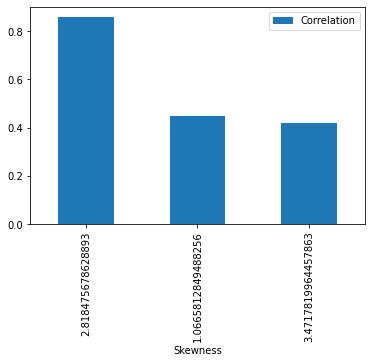

In [ ]:
# Query1 :: Two functions are applied on columns of the Dataframe 
# 1- Skewness calculate on `Flow IAT Mean` and can see the result in Skewness column.( ) Skewness is a measure of the asymmetry)
# 2- Correlation just consider where `Flow IAT Mean` > 100 and `Flow Duration` > 1100 only as Correlation cloumn (corr is a measure statistical relationship) 
# group by order the result by Label column, next the result is poltted by Bar chart as you can see. 
df2.createOrReplaceTempView("IDSView") 
sqlDF = spark.sql("SELECT * FROM IDSView") 
sqlDF = spark.sql(" SELECT  skewness(`Flow IAT Mean` )  AS Skewness , corr( `Flow IAT Mean`, `Flow Duration` ) As  Correlation  FROM IDSview where `Flow IAT Mean` > 100 and `Flow Duration` > 1100 group by `label`  ")
sqlDF.show()
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='Correlation',ascending=False).plot(x ='Skewness', y='Correlation', kind = 'bar')





+--------------------+-------+------------+
|             Result1|Result2|     Result3|
+--------------------+-------+------------+
|2.5994596231315747E7|  1.6E9|1.19991524E8|
+--------------------+-------+------------+



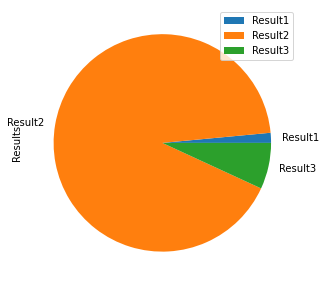

In [ ]:
#Query2 :: 3 function used for this Query
# 1- The Std function is applied to the `Idle Max` column result is showing in result1 coulmn. 
# 2- Minimum of `Idle Std` column calcute and because in this case is equal to 0, result1 and result3 are too big values then cannot show it in the chart to solve it so summed with 5000 and multipled with 320000 to make the result biger which can show it in the chart.
# 3- The Maximum function is applied to the `Idle Mean` column where `Idle Mean` is Not equal with 0. 
# 4- and then plot all results by Pie chart 

sqlDF = spark.sql("""
                 SELECT std(`Idle Max`)  AS Result1 , 
             (min(`Idle Std`)+5000)*320000 AS Result2 , 
                  max(`Idle Mean`) As Result3  From IDSview  where `Idle Mean` <>0   """)
sqlDF.show()
pandas_df=sqlDF.toPandas()
if (len(pandas_df)==1):
  pandas_df = pandas_df.T
pandas_df
pp= pandas_df.rename(columns={0: 'Results'})
plot = pp.plot.pie (y='Results' , figsize=(5,5))


                  Flow Duration  ...  Bwd Pkt Len Std
Flow Duration          1.000000  ...         0.011025
Tot Bwd Pkts           0.002418  ...         0.026662
Bwd Pkt Len Max        0.012510  ...         0.964007
Bwd Pkt Len Min       -0.005971  ...        -0.281131
Bwd Pkt Len Mean       0.011224  ...         0.776970
Bwd Pkt Len Std        0.011025  ...         1.000000

[6 rows x 6 columns]


Text(0.5, 1.0, 'Correlation matrix')

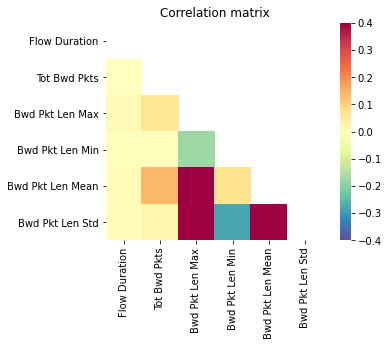

In [ ]:
# Analysis part1:: 'Correlation(Pearson)+ Mean'
# some columns selected from the dataframe 
# correlation_matrix function define a matrix correlation, dataframe columns and method of correlation are inputs the function.
# Nulls in the new dataframe are repleased by 0
# correlation function is called and printed. 
# Mean is calcuted and because correlation of it with itself in the  main diagonal equal to 1,skipped 1.0 values by mean_corr[i]-=1.0 , Sum all values and divided by count number of values. 
# finally, as you can see the correlation matrix is showed by diffrent colours to undrestand it easier. 


df = spark.read.csv("./IDS2018")   
df_quant= IDS_df[['Flow Duration','Tot Bwd Pkts','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std']]

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
def correlation_matrix(df_quant, corr_columns, method):
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=corr_columns, outputCol=vector_col)
    df_vector = assembler.transform(df_quant).select(vector_col)
    matrix = Correlation.corr(df_vector, vector_col, method)

    result = matrix.collect()[0]["pearson({})".format(vector_col)].values
    return pd.DataFrame(result.reshape(-1, len(corr_columns)), columns=corr_columns, index=corr_columns)


df_quant = df_quant.fillna(0)
#call correlation_matrix Function
corr=correlation_matrix(df_quant,df_quant.columns, 'pearson')
print(corr);

# Mean 
mean_corr=corr.sum(axis=0)
for i in range(len(mean_corr)):
  mean_corr[i]-=1.0
mean_corr[i]/=(len(mean_corr)-1)

mean_corr

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')



     Flow Duration  Tot Bwd Pkts  TotLen Bwd Pkts
0.1           40.0           0.0              0.0
0.2          313.0           0.0              0.0
0.3          888.0           1.0              0.0
0.4         1807.8           1.0              0.0
0.5        13007.0           1.0             85.0
0.9     54092671.0           8.0           1731.0


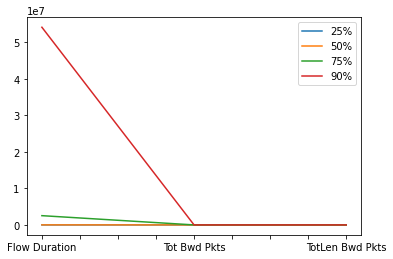

In [ ]:
# Task3 part 2 'Percentile + Quantile'
###- what are Percentile and Quantile? Quantiles are points which relate to the rank order of values in that distribution in a distribution.
#One fifth of the way up to thisrank order is the 25th percentile (lower quartile)....
#Percentile rank is the proportion of values that a particular
#value is greater than or equal to in a distribution. 
# 1- new dataframe created by 3 columns from the main dataframe. 0.005 Sample(randomly) of records is chosen to reduce the time of processing.
# 2- Null columns are removed by dropna() and changed it to Pandas dataframe and Quantile is used in Pandas 
# 3- get Quantile for (0.1, 0.2, 0.3, 0.4, 0.5, 0.9) rates and the result is Percentile matrix and then printed. 
# 4- In order to vitualization for 4 Percentiles (25%, 50%,75%,90%) is considered. 
# 5- and then Plot the result to show it. 


import numpy as np
import pandas as pd

new_df = IDS_df[['Flow Duration', 'Tot Bwd Pkts', 'TotLen Bwd Pkts']]
new_df=new_df.sample(0.005)


new_df.dropna()
percent_df = new_df.select("*").toPandas()

percentile_matrix=percent_df.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.9])

print(percentile_matrix)

df = pd.DataFrame({ '25%': percent_df.quantile(0.25), '50%': percent_df.quantile(0.5),'75%': percent_df.quantile(0.75), '90%': percent_df.quantile(0.9)})

df.plot()



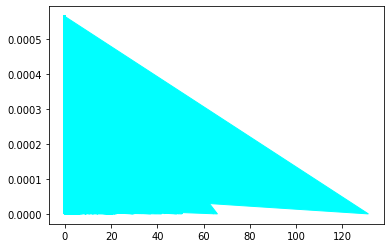

In [ ]:
 # Task 3 part 3 'KernelDensity' (NON-PARAMETRIC)
 # 9 columns are selected and make a new dataframe, at first. 
 # Delete Null columns from new dataframes by Dropna() and 0.01 sample of records is chosen to reduce the time of processing be easier to use. 
 # convert dataframe to Pandas and 8 features are chosen as X and Label feature is chosed as Y because of split data to Train and Test. 
 # data is splited to data and test (30%, 70%) and then normalized by Z-Score Normalization method that use Mean to normalize the Train and Test data. Normalization provides more accuracy in the result because the values of features have diffrent values.  
 # Kernel Density model is created by Gussian method and then fit X-Train into the model and Score sample of X-test is calulated. 
 # finally, poltted the result, Please note that because Randomly data is using in this code so will gives diffrent result per compile. 



import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # Import train_test_split function

new_df1= IDS_df.select('Flow Duration','Tot Bwd Pkts','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label')
new_df1.dropna()
new_df1=new_df1.sample(0.01)
pandas_df = new_df1.select("*").toPandas()
col_names = ['Flow Duration','Tot Bwd Pkts','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label']

feature_cols = ['Flow Duration','Tot Bwd Pkts','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min']
X = pandas_df[feature_cols] # Features
y = pandas_df.Label


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
#kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
model = KernelDensity(kernel='gaussian')
model.fit(X_train)
log_dens = model.score_samples(X_test)
plt.fill(X_test, np.exp(log_dens), c='cyan')
plt.show()

Accuracy: 0.8627859460758783
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0668079 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0668079 to fit

                          precision    recall  f1-score   support

                  Benign       0.94      0.96      0.95     18468
          FTP-BruteForce       0.71      0.79      0.75       854
          SSH-Bruteforce       0.00      0.00      0.00         2
   DoS attacks-GoldenEye       0.50      0.50      0.50         2
   DoS attacks-Slowloris       0.61      0.63      0.62      1969
DoS attacks-SlowHTTPTest       0.73      1.00      0.84         8
        DoS attacks-Hulk       0.74      0.80      0.77       147
    DDOS attack-LOIC-UDP       0.52      0.43      0.47      1420
        DDOS attack-HOIC       0.66      0.36      0.46       442
        Brute Force -Web       0.91      0.91      0.91        34
        Brute Force -XSS       0.58      0.76      0.66       585
           Infil

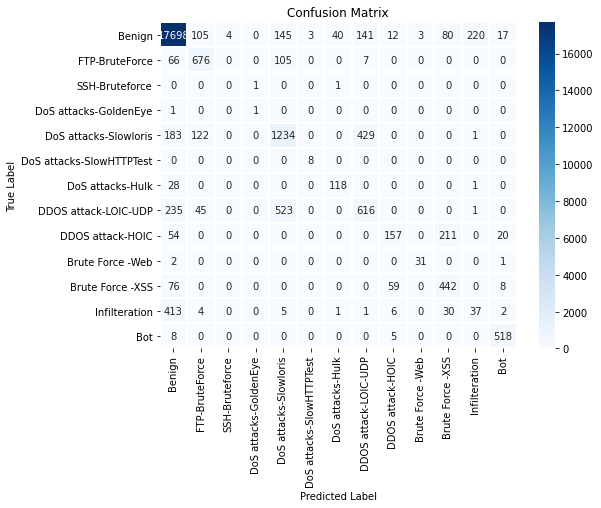

In [ ]:
# Task 4 Machine Learning 'DecisionTree'
# 9 columns are selected and make a new dataframe, at first. 
# Delete Null columns from new dataframes by Dropna() and 0.01 sample of records is chosen to reduce the time of processing be easier to use. 
# convert dataframe to Pandas and 8 features are chosen as X and Label feature is chosed as Y because of split data to Train and Test. 
# data is splited to data and test (30%, 70%) and the DecisionTree is created, next fitted data(X_train,y_train) in the Tree
# Tried to predict the response and Accuracy is showing in this stage as result which is showing 86% . 
# next, is calcuted how many unique class in Label and save the result as PNG that you can see the file in the left hand in this Colab page. 
# the Counfusion Matrix code is written, creates a matrix 5*5 
# what does Confusion Matrix mean? A confusion matrix is a table which is often used on a collection of test data for which the true values are known to explain the output of a classification model. 
# at last, Plot function is applied as a visualization. 


from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.functions import *
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 


new_df1= IDS_df.select('Flow Duration','Tot Bwd Pkts','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label')
new_df1.dropna()
new_df1=new_df1.sample(0.01)
pandas_df = new_df1.select("*").toPandas()

feature_cols = ['Flow Duration','Tot Bwd Pkts','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min']
X = pandas_df[feature_cols] # Features
y = pandas_df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

class_names=pandas_df['Label'].unique()
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('IDS.png')
Image(graph.create_png())

from sklearn.metrics import confusion_matrix, classification_report
class_names1=y.unique()

print(classification_report(y_test,y_pred,target_names=class_names1))


def show_confusion_matrix(validations, predictions, class_names):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="Blues",
                linecolor='white',
                linewidths=1,
                xticklabels=class_names,
                yticklabels=class_names,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

import seaborn as sns
show_confusion_matrix(y_test, y_pred, class_names1)

